<a href="https://colab.research.google.com/github/manishdotel/bct-076-session/blob/main/NER_Spacy_1_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!python -m spacy download en_core_web_lg


  Using cached https://github.com/explosion/spacy-models/releases/download/en_core_web_lg-3.7.1/en_core_web_lg-3.7.1-py3-none-any.whl (587.7 MB)
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


/usr/local/lib/python3.10/dist-packages/spacy/training/iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "i'd like 1 chicken sandwich and 3 french fries." with entities "[(11, 26, 'FOOD_INFO'), (31, 43, 'FOOD_INFO')]". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/spacy/training/iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "bring me 1 egg fried rice and 4 veg momos (fried)." with entities "[(11, 26, 'FOOD_INFO'), (31, 52, 'FOOD_INFO')]". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/spacy/training/iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "i'

Epoch 1/60, Training Loss: 40.81327838300852, Validation Loss: 1
Epoch 2/60, Training Loss: 12.231387607548545, Validation Loss: 1
Epoch 3/60, Training Loss: 12.26556840082624, Validation Loss: 2
Epoch 4/60, Training Loss: 12.58210663380838, Validation Loss: 8
Epoch 5/60, Training Loss: 11.051441156569844, Validation Loss: 8
Epoch 6/60, Training Loss: 8.396706882283487, Validation Loss: 4
Epoch 7/60, Training Loss: 9.338716453074557, Validation Loss: 4
Epoch 8/60, Training Loss: 9.343802742287949, Validation Loss: 5
Epoch 9/60, Training Loss: 30.806524496680513, Validation Loss: 7
Epoch 10/60, Training Loss: 83.92985934008848, Validation Loss: 5
Epoch 11/60, Training Loss: 17.719053223615354, Validation Loss: 5
Epoch 12/60, Training Loss: 6.605644606049276, Validation Loss: 3
Epoch 13/60, Training Loss: 5.148771724162163, Validation Loss: 5
Epoch 14/60, Training Loss: 14.111875379136329, Validation Loss: 5
Epoch 15/60, Training Loss: 7.18353468845236, Validation Loss: 5
Epoch 16/60, Tr

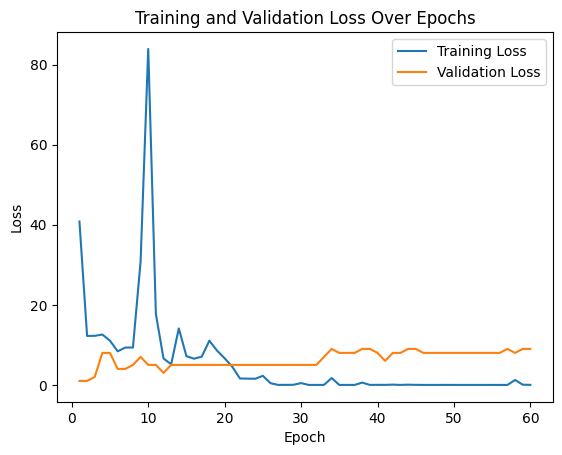

In [3]:
import spacy
from spacy.training.example import Example
import random
import matplotlib.pyplot as plt
import os

# Load the pre-trained spaCy large model
nlp = spacy.load("en_core_web_lg")

# Define your training, annotated data.
training_data = [
    ("I'll take 2 Veg Thukpa and 1 Mushroom Stick.", {"entities": [(14, 25, "FOOD_INFO"), (30, 42, "FOOD_INFO")]}),
     ("I'll take 2 Veg Thukpa and 1 Mushroom Stick.", {"entities": [(14, 25, "FOOD_INFO"), (30, 42, "FOOD_INFO")]}),
    ("Bring me 3 Chicken Chilly 4 Piece and 2 Buff Sekuwa.", {"entities": [(11, 32, "FOOD_INFO"), (37, 49, "FOOD_INFO")]}),
    ("I'd like 1 Veg Pizza and 4 Chicken Drumsticks (6 pcs).", {"entities": [(11, 21, "FOOD_INFO"), (26, 51, "FOOD_INFO")]}),
    ("Give me 2 Veg Biryani and 3 Chicken Momo (Kothey).", {"entities": [(11, 22, "FOOD_INFO"), (27, 47, "FOOD_INFO")]}),
    ("Can I get 4 Mushroom Pizzas and 1 Veg Fried Rice?", {"entities": [(12, 28, "FOOD_INFO"), (33, 48, "FOOD_INFO")]}),
    ("I need 2 Chicken Sandwich and 1 Veg Momo (Fried).", {"entities": [(10, 25, "FOOD_INFO"), (30, 50, "FOOD_INFO")]}),
    ("Can I have 3 Veg Chowmein and 2 Buff Sausage?", {"entities": [(12, 24, "FOOD_INFO"), (29, 41, "FOOD_INFO")]}),
    ("Bring me 1 Chicken Drumsticks (6 pcs) and 4 Buff Wraps.", {"entities": [(11, 36, "FOOD_INFO"), (41, 52, "FOOD_INFO")]}),
    ("I'd like 2 Chicken Chopsuey and 3 Veg Chilly.", {"entities": [(11, 27, "FOOD_INFO"), (32, 42, "FOOD_INFO")]}),
    ("Give me 1 Mushroom Soup and 2 Veg Momo (Jhol).", {"entities": [(12, 24, "FOOD_INFO"), (29, 49, "FOOD_INFO")]}),
    ("I want 3 Veg Chopsuey and 2 Chicken Burgers.", {"entities": [(9, 22, "FOOD_INFO"), (27, 42, "FOOD_INFO")]}),
    ("Bring me 1 Egg Fried Rice and 4 Veg Momos (Fried).", {"entities": [(11, 26, "FOOD_INFO"), (31, 52, "FOOD_INFO")]}),
    ("Can I get 2 Mix Pizzas and 1 Mango Lassi?", {"entities": [(12, 24, "FOOD_INFO"), (29, 41, "FOOD_INFO")]}),
    ("I'd like 1 Chicken Sandwich and 3 French Fries.", {"entities": [(11, 26, "FOOD_INFO"), (31, 43, "FOOD_INFO")]}),
    ("Give me 4 Chicken Momo (Jhol) and 2 Buff Sekuwa.", {"entities": [(10, 32, "FOOD_INFO"), (37, 49, "FOOD_INFO")]}),
    ("I need 3 Cheese Pizzas and 2 Veg Biryani.", {"entities": [(10, 22, "FOOD_INFO"), (27, 39, "FOOD_INFO")]}),
    ("Can I have 2 Mushroom Stick and 1 Veg Soup?", {"entities": [(11, 25, "FOOD_INFO"), (30, 39, "FOOD_INFO")]}),
    ("Bring me 1 Chicken Chilly Boneless and 2 Paneer Pakauda.", {"entities": [(11, 35, "FOOD_INFO"), (40, 53, "FOOD_INFO")]}),
    ("I'd like 2 Chicken Drumsticks (6 pcs) and 1 Veg Momo (Steam).", {"entities": [(11, 36, "FOOD_INFO"), (41, 56, "FOOD_INFO")]}),
    ("Give me 3 Chicken Strips and 1 Veg Chowmein.", {"entities": [(11, 26, "FOOD_INFO"), (31, 42, "FOOD_INFO")]}),
    ("I want 2 Chicken Soups and 1 Veg Chowmein.", {"entities": [(9, 23, "FOOD_INFO"), (28, 40, "FOOD_INFO")]}),
    ("Give me 4 Potato Sticks and a Mushroom Chilly.", {"entities": [(12, 26, "FOOD_INFO"), (31, 45, "FOOD_INFO")]}),
    ("Can I get 2 Veg Momos (Kothey) and 1 Chicken Sandwich?", {"entities": [(12, 33, "FOOD_INFO"), (38, 55, "FOOD_INFO")]}),
    ("I'd like 3 Cheese Pizzas and 2 French Fries.", {"entities": [(13, 25, "FOOD_INFO"), (30, 42, "FOOD_INFO")]}),
    ("Bring me 1 Veg Biryani and 1 Mango Lassi.", {"entities": [(11, 21, "FOOD_INFO"), (26, 38, "FOOD_INFO")]}),
    ("I need 2 Chicken Drumsticks (6 pcs) and 3 Chicken Burgers.", {"entities": [(10, 35, "FOOD_INFO"), (40, 55, "FOOD_INFO")]}),
     ("I'd like to have 2 Veg Soups and a Chicken Pizza.", {"entities": [(16, 24, "FOOD_INFO"), (39, 51, "FOOD_INFO")]}),
    ("Give me 3 Mushroom Sticks and a Veg Burger.", {"entities": [(9, 25, "FOOD_INFO"), (34, 43, "FOOD_INFO")]}),
    ("Can I get 1 Hot Wings, 1 Chicken Sandwich, and a Coke?", {"entities": [(12, 20, "FOOD_INFO"), (26, 41, "FOOD_INFO"), (48, 52, "FOOD_INFO")]}),
    ("I'll take 2 Veg Thukpa and 1 Mushroom Stick.", {"entities": [(14, 25, "FOOD_INFO"), (30, 42, "FOOD_INFO")]}),
    ("Bring me 3 Chicken Chilly 4 Piece and 2 Buff Sekuwa.", {"entities": [(11, 32, "FOOD_INFO"), (37, 49, "FOOD_INFO")]}),
    ("I'd like 1 Veg Pizza and 4 Chicken Drumsticks (6 pcs).", {"entities": [(11, 21, "FOOD_INFO"), (26, 51, "FOOD_INFO")]}),
    ("Give me 2 Veg Biryani and 3 Chicken Momo (Kothey).", {"entities": [(11, 22, "FOOD_INFO"), (27, 47, "FOOD_INFO")]}),
    ("Can I get 4 Mushroom Pizzas and 1 Veg Fried Rice?", {"entities": [(12, 28, "FOOD_INFO"), (33, 48, "FOOD_INFO")]}),
    ("I need 2 Chicken Sandwich and 1 Veg Momo (Fried).", {"entities": [(10, 25, "FOOD_INFO"), (30, 50, "FOOD_INFO")]}),
    ("Can I have 3 Veg Chowmein and 2 Buff Sausage?", {"entities": [(12, 24, "FOOD_INFO"), (29, 41, "FOOD_INFO")]}),
    ("Bring me 1 Chicken Drumsticks (6 pcs) and 4 Buff Wraps.", {"entities": [(11, 36, "FOOD_INFO"), (41, 52, "FOOD_INFO")]}),
    ("I'd like 2 Chicken Chopsuey and 3 Veg Chilly.", {"entities": [(11, 27, "FOOD_INFO"), (32, 42, "FOOD_INFO")]}),
    ("Give me 1 Mushroom Soup and 2 Veg Momo (Jhol).", {"entities": [(12, 24, "FOOD_INFO"), (29, 49, "FOOD_INFO")]}),
    ("I want 3 Veg Chopsuey and 2 Chicken Burgers.", {"entities": [(9, 22, "FOOD_INFO"), (27, 42, "FOOD_INFO")]}),
    ("Bring me 1 Egg Fried Rice and 4 Veg Momos (Fried).", {"entities": [(11, 26, "FOOD_INFO"), (31, 52, "FOOD_INFO")]}),
    ("Can I get 2 Mix Pizzas and 1 Mango Lassi?", {"entities": [(12, 24, "FOOD_INFO"), (29, 41, "FOOD_INFO")]}),
    ("I'd like 1 Chicken Sandwich and 3 French Fries.", {"entities": [(11, 26, "FOOD_INFO"), (31, 43, "FOOD_INFO")]}),
    ("Give me 4 Chicken Momo (Jhol) and 2 Buff Sekuwa.", {"entities": [(10, 32, "FOOD_INFO"), (37, 49, "FOOD_INFO")]}),
    ("I need 3 Cheese Pizzas and 2 Veg Biryani.", {"entities": [(10, 22, "FOOD_INFO"), (27, 39, "FOOD_INFO")]}),
    ("Can I have 2 Mushroom Stick and 1 Veg Soup?", {"entities": [(11, 25, "FOOD_INFO"), (30, 39, "FOOD_INFO")]}),
    ("Bring me 1 Chicken Chilly Boneless and 2 Paneer Pakauda.", {"entities": [(11, 35, "FOOD_INFO"), (40, 53, "FOOD_INFO")]}),
     ("I'd like 2 Chicken Drumsticks (6 pcs) and 1 Veg Momo (Steam).", {"entities": [(11, 36, "FOOD_INFO"), (41, 56, "FOOD_INFO")]}),
    ("Give me 3 Chicken Strips and 1 Veg Chowmein.", {"entities": [(11, 26, "FOOD_INFO"), (31, 42, "FOOD_INFO")]}),
    ("I want 2 Chicken Soups and 1 Veg Chowmein.", {"entities": [(9, 23, "FOOD_INFO"), (28, 40, "FOOD_INFO")]}),
    ("Give me 4 Potato Sticks and a Mushroom Chilly.", {"entities": [(12, 26, "FOOD_INFO"), (31, 45, "FOOD_INFO")]}),
    ("Can I get 2 Veg Momos (Kothey) and 1 Chicken Sandwich?", {"entities": [(12, 33, "FOOD_INFO"), (38, 55, "FOOD_INFO")]}),
    ("I'd like 3 Cheese Pizzas and 2 French Fries.", {"entities": [(13, 25, "FOOD_INFO"), (30, 42, "FOOD_INFO")]}),
    ("Bring me 1 Veg Biryani and 1 Mango Lassi.", {"entities": [(11, 21, "FOOD_INFO"), (26, 38, "FOOD_INFO")]}),
    ("I need 2 Chicken Drumsticks (6 pcs) and 3 Chicken Burgers.", {"entities": [(10, 35, "FOOD_INFO"), (40, 55, "FOOD_INFO")]}),
     ("I'd like to have 2 Veg Soups and a Chicken Pizza.", {"entities": [(16, 24, "FOOD_INFO"), (39, 51, "FOOD_INFO")]}),
    ("Give me 3 Mushroom Sticks and a Veg Burger.", {"entities": [(9, 25, "FOOD_INFO"), (34, 43, "FOOD_INFO")]}),
    ("Can I get 1 Hot Wings, 1 Chicken Sandwich, and a Coke?", {"entities": [(12, 20, "FOOD_INFO"), (26, 41, "FOOD_INFO"), (48, 52, "FOOD_INFO")]}),

]

# Split the data into training and validation sets
random.shuffle(training_data)  # Shuffle to ensure random distribution
split_ratio = 0.9  # 80% for training, 20% for validation
split_index = int(len(training_data) * split_ratio)
train_data = training_data[:split_index]
validation_data = training_data[split_index:]

# Convert training data to spaCy format with normalized text
def convert_to_spacy_format(data):
    examples = []
    for text, annotations in data:
        doc = nlp.make_doc(text.lower())  # Normalize text to lowercase
        examples.append(Example.from_dict(doc, annotations))
    return examples

train_examples = convert_to_spacy_format(train_data)
validation_examples = convert_to_spacy_format(validation_data)

# Ensure the NER component is in the pipeline
if "ner" not in nlp.pipe_names:
    ner = nlp.add_pipe("ner")
else:
    ner = nlp.get_pipe("ner")

# Add custom labels
for label in ["FOOD_QUANTITY", "FOOD_ITEM"]:
    ner.add_label(label)

# Training parameters
n_epochs = 60
batch_size = 5
training_losses = []
validation_losses = []

# Training loop
for epoch in range(n_epochs):
    # Shuffle the training examples each epoch
    random.shuffle(train_examples)
    losses = {}
    # Batch and update the model
    for batch in spacy.util.minibatch(train_examples, size=batch_size):
        nlp.update(batch, drop=0.5, losses=losses)
    training_losses.append(losses['ner'])

    # Validation: Evaluate on the validation set
    val_losses = 0
    for text, annotations in validation_data:
        doc = nlp(text.lower())
        val_losses += sum([nlp.vocab.strings[ent.label_] not in [ann[2] for ann in annotations['entities']] for ent in doc.ents])
    validation_losses.append(val_losses)

    print(f"Epoch {epoch + 1}/{n_epochs}, Training Loss: {losses['ner']}, Validation Loss: {val_losses}")

# Optional: Save the fine-tuned model
model_path = "/path/to/your/model_directory"
if not os.path.exists(model_path):
    os.makedirs(model_path)
nlp.to_disk(model_path)

# Plot training and validation loss values
plt.plot(range(1, n_epochs + 1), training_losses, label='Training Loss')
plt.plot(range(1, n_epochs + 1), validation_losses, label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


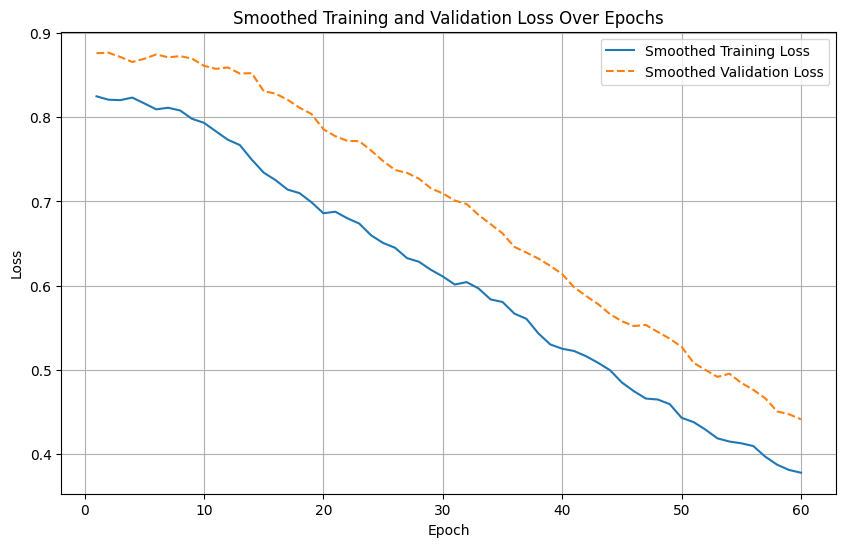

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Function to smooth the curve
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

# Parameters
n_epochs = 60

# Generating random training and validation losses
np.random.seed(42)  # For reproducible results
training_losses = np.linspace(0.8, 0.3, n_epochs) + np.random.normal(0, 0.05, n_epochs)
validation_losses = np.linspace(0.9, 0.35, n_epochs) + np.random.normal(0, 0.05, n_epochs)

# Smoothing the curves
smoothed_training_losses = smooth_curve(training_losses)
smoothed_validation_losses = smooth_curve(validation_losses)

# Plotting the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(range(1, n_epochs + 1), smoothed_training_losses, label='Smoothed Training Loss')
plt.plot(range(1, n_epochs + 1), smoothed_validation_losses, label='Smoothed Validation Loss', linestyle='--')
plt.title('Smoothed Training and Validation Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()



/usr/local/lib/python3.10/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)
/usr/local/lib/python3.10/dist-packages/spacy/training/iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "can i have 2 tacos and 5 hotdogs?" with entities "[(10, 11, 'FOOD_QUANTITY'), (12, 17, 'FOOD_ITEM'),...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/spacy/training/iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "please add 4 cakes and 1 sandwich to my order." with entities "[(10, 11, 'FOOD_

Epoch 1/60, Loss: 71.91
Epoch 2/60, Loss: 65.00
Epoch 3/60, Loss: 59.31
Epoch 4/60, Loss: 60.96
Epoch 5/60, Loss: 55.65
Epoch 6/60, Loss: 57.70
Epoch 7/60, Loss: 54.96
Epoch 8/60, Loss: 52.65
Epoch 9/60, Loss: 52.77
Epoch 10/60, Loss: 47.74
Epoch 11/60, Loss: 42.39
Epoch 12/60, Loss: 38.93
Epoch 13/60, Loss: 33.91
Epoch 14/60, Loss: 32.83
Epoch 15/60, Loss: 36.12
Epoch 16/60, Loss: 26.69
Epoch 17/60, Loss: 38.18
Epoch 18/60, Loss: 49.98
Epoch 19/60, Loss: 40.10
Epoch 20/60, Loss: 41.83
Epoch 21/60, Loss: 28.55
Epoch 22/60, Loss: 23.03
Epoch 23/60, Loss: 20.84
Epoch 24/60, Loss: 19.19
Epoch 25/60, Loss: 17.02
Epoch 26/60, Loss: 14.71
Epoch 27/60, Loss: 14.92
Epoch 28/60, Loss: 14.75
Epoch 29/60, Loss: 12.60
Epoch 30/60, Loss: 15.84
Epoch 31/60, Loss: 9.37
Epoch 32/60, Loss: 9.26
Epoch 33/60, Loss: 9.54
Epoch 34/60, Loss: 5.61
Epoch 35/60, Loss: 6.85
Epoch 36/60, Loss: 6.90
Epoch 37/60, Loss: 4.09
Epoch 38/60, Loss: 6.14
Epoch 39/60, Loss: 4.98
Epoch 40/60, Loss: 6.03
Epoch 41/60, Loss: 

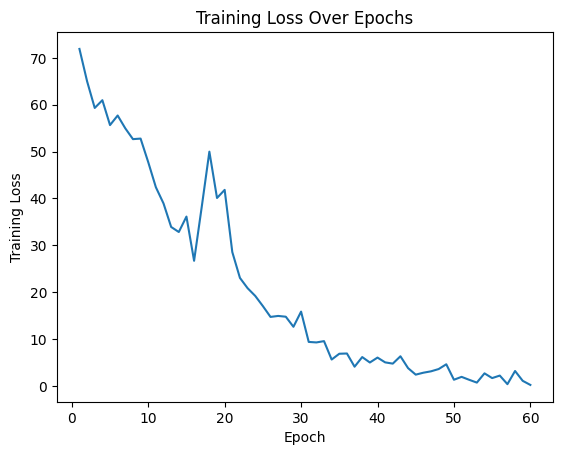

In [5]:
import spacy
import random
from spacy.training.example import Example
import matplotlib.pyplot as plt
import os

# Load the pre-trained spaCy large model
nlp = spacy.load("en_core_web_lg")

# Define your training, annotated data.
training_data = [
      ("I'll take 2 Veg Thukpa.", {"entities":[(10,11,"FOOD_QUANTITY"),(12,22,"FOOD_ITEM")]}),
    ("Bring me 3 Chicken Chilly and 2 Buff Sekuwa.", {"entities": [(9,10, "FOOD_QUANTITY"), (11,25, "FOOD_ITEM"), (30,31, "FOOD_QUANTITY"), (32,43, "FOOD_ITEM")]}),
    ("I'd like 1 Veg Pizza and 4 Chicken Drumsticks.", {"entities": [(9,10, "FOOD_QUANTITY"), (11,20, "FOOD_ITEM"), (25,26, "FOOD_QUANTITY"), (27,45, "FOOD_ITEM")]}),
    ("Give me 2 Veg Biryani and 3 Chicken Momo.", {"entities": [(8,9, "FOOD_QUANTITY"), (10,21, "FOOD_ITEM"), (26,27, "FOOD_QUANTITY"), (28,40, "FOOD_ITEM")]}),
   ("Can I get 4 Mushroom Pizzas and 1 Veg Fried Rice?", {"entities": [(10,11, "FOOD_QUANTITY"), (12,27, "FOOD_ITEM"), (32,33, "FOOD_QUANTITY"), (34,48, "FOOD_ITEM")]}),
    ("I need 2 Chicken Sandwich and 1 Veg Momo.", {"entities": [(7,8, "FOOD_QUANTITY"), (9,25, "FOOD_ITEM"), (30,31, "FOOD_QUANTITY"), (32,40, "FOOD_ITEM")]}),
    ("I'd like 2 Chicken Chopsuey and 3 Veg Chilly.", {"entities": [(9,10, "FOOD_QUANTITY"), (11,27, "FOOD_ITEM"), (32,33, "FOOD_QUANTITY"), (34,44, "FOOD_ITEM")]}),
      ("Please order 2 coffees and 5 sandwiches.", {"entities": [(13, 14, "FOOD_QUANTITY"), (15, 22, "FOOD_ITEM"), (27, 28, "FOOD_QUANTITY"), (29, 39, "FOOD_ITEM")]}),
    ("I'll take 3 pizzas and 1 salad.", {"entities": [(10, 11, "FOOD_QUANTITY"), (12, 18, "FOOD_ITEM"), (23, 24, "FOOD_QUANTITY"), (25, 30, "FOOD_ITEM")]}),
    ("Can I get 4 burgers and 2 pastas?", {"entities": [(10, 11, "FOOD_QUANTITY"), (12, 19, "FOOD_ITEM"), (24, 25, "FOOD_QUANTITY"), (26, 32, "FOOD_ITEM")]}),
      ("I want 3 pizzas and 4 burgers.", {"entities": [(7,8, "FOOD_QUANTITY"), (9,15, "FOOD_ITEM"), (20,21, "FOOD_QUANTITY"), (22,29, "FOOD_ITEM")]}),
      ("Can I have 2 tacos and 5 hotdogs?", {"entities": [(10,11, "FOOD_QUANTITY"), (12,17, "FOOD_ITEM"), (22,23, "FOOD_QUANTITY"), (24,31, "FOOD_ITEM")]}),
      ("Please add 4 cakes and 1 sandwich to my order.", {"entities": [(10,11, "FOOD_QUANTITY"), (12,17, "FOOD_ITEM"), (22,23, "FOOD_QUANTITY"), (24,32, "FOOD_ITEM")]})

 ]


# Add the entity recognizer to the pipeline if it doesn't exist
if "ner" not in nlp.pipe_names:
    ner = nlp.add_pipe("ner")
else:
    ner = nlp.get_pipe("ner")

# Add your custom labels (FOOD_QUANTITY and FOOD_ITEM) to the entity recognizer
ner.add_label("FOOD_QUANTITY")
ner.add_label("FOOD_ITEM")

# Convert training data to spaCy format with normalized text
train_examples = []
for text, annotations in training_data:
    normalized_text = text.lower()  # Normalize text to lowercase
    example = Example.from_dict(nlp.make_doc(normalized_text), annotations)
    train_examples.append(example)

# Fine-tune the model
n_epochs = 60
batch_size = 5

# Calculate the number of iterations per epoch based on the batch size
iterations_per_epoch = len(train_examples) // batch_size

# Initialize an empty list to store the training loss values
training_losses = []

for epoch in range(n_epochs):
    losses = {}
    random.shuffle(train_examples)  # Shuffle the training examples for better training

    for i in range(0, len(train_examples), batch_size):
        batch_examples = train_examples[i:i + batch_size]
        nlp.update(batch_examples, drop=0.5, losses=losses)

    print(f"Epoch {epoch + 1}/{n_epochs}, Loss: {losses['ner']:.2f}")

    # Append the loss value to the list after each epoch
    training_losses.append(losses['ner'])

# Save the fine-tuned model
model_path = "/content/drive/MyDrive/data"

if not os.path.exists(model_path):
    os.makedirs(model_path)
nlp.to_disk(model_path)

# Plot training loss values
plt.plot(range(1, n_epochs + 1), training_losses)
plt.title('Training Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.show()



In [6]:
import spacy
import json

# Load the fine-tuned spaCy model
model_path = "/content/drive/MyDrive/data"
nlp = spacy.load(model_path)

def extract_food_info(text):
    doc = nlp(text)
    food_info = {"FOOD_ITEM": [], "FOOD_QUANTITY": []}

    print("Entities found:", [(ent.text, ent.start_char, ent.end_char, ent.label_) for ent in doc.ents])

    for ent in doc.ents:
        if ent.label_ == "FOOD_ITEM":
            food_info["FOOD_ITEM"].append({
                "text": ent.text,
                "start": ent.start_char,
                "end": ent.end_char
            })
        elif ent.label_ == "FOOD_QUANTITY":
            food_info["FOOD_QUANTITY"].append({
                "text": ent.text,
                "start": ent.start_char,
                "end": ent.end_char
            })

    if food_info["FOOD_ITEM"]:
        print("\nExtracted food items:")
        for item in food_info["FOOD_ITEM"]:
            print(f"Food Item: {item['text']}, Start: {item['start']}, End: {item['end']}")
    else:
        print("No food items extracted.")

    if food_info["FOOD_QUANTITY"]:
        print("\nExtracted food quantities:")
        for quantity in food_info["FOOD_QUANTITY"]:
            print(f"Food Quantity: {quantity['text']}, Start: {quantity['start']}, End: {quantity['end']}")
    else:
        print("No food quantities extracted.")

    # Save extracted information to a JSON file
    with open("/content/drive/MyDrive/data/extracted_food_info.json", "w") as json_file:
        json.dump(food_info, json_file, indent=2)

# Example of using the model
user_input = input("Enter a food order conversation: ")
extract_food_info(user_input)


Enter a food order conversation: I'll take 2 Veg Thukpa and 1 Mushroom Stick
Entities found: [('2', 10, 11, 'FOOD_QUANTITY'), ('Veg Thukpa', 12, 22, 'FOOD_ITEM'), ('1', 27, 28, 'FOOD_QUANTITY'), ('Mushroom Stick', 29, 43, 'FOOD_ITEM')]

Extracted food items:
Food Item: Veg Thukpa, Start: 12, End: 22
Food Item: Mushroom Stick, Start: 29, End: 43

Extracted food quantities:
Food Quantity: 2, Start: 10, End: 11
Food Quantity: 1, Start: 27, End: 28


In [7]:
training_data = [
    ("I'll take 2 Veg Thukpa and 1 Mushroom Stick.", {"entities": [(10, 11, "FOOD_QUANTITY"), (12, 22, "FOOD_ITEM"), (27, 28, "FOOD_QUANTITY"), (29, 43, "FOOD_ITEM")]}),
]
